In [1]:
import pandas as pd

In [2]:
from bs4 import BeautifulSoup

In [3]:
from IPython.display import HTML

In [4]:
from sklearn.metrics import roc_auc_score, roc_curve

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
from sklearn.svm import LinearSVC

In [7]:
from sklearn.svm import SVC

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.dummy import DummyClassifier

In [10]:
from sklearn.model_selection import cross_val_score, KFold

In [11]:
import matplotlib.pyplot as plt

In [12]:
red_df = pd.read_csv('red_wine.csv')

In [13]:
white_df=pd.read_csv('white_wine.csv')

In [14]:
profile_data = []

# Iterate through columns in the DataFrame
for column_name, column_data in red_df.items():
    column_info = {
        'Column Name': column_name,
        'Data Type': column_data.dtype,
        'Number of Unique Values': column_data.nunique(),
        'Min Value': column_data.min(),
        'Max Value': column_data.max()
        
    }
    profile_data.append(column_info)

# Create a DataFrame from the profile_data list
profile_df = pd.DataFrame(profile_data)
print(profile_df)

   Column Name Data Type  Number of Unique Values Min Value Max Value
0  citric acid   float64                       74       0.0       1.0
1    sulphates   float64                       77      0.25       2.0
2      alcohol   float64                       49       8.0      12.8
3         type    object                        2      high       low


In [15]:
html_table = profile_df.to_html(classes='table table-bordered', index=False)

In [16]:
soup = BeautifulSoup(html_table, 'html.parser')
pretty_html = soup.prettify()

In [17]:
display(HTML(pretty_html))

Column Name,Data Type,Number of Unique Values,Min Value,Max Value
citric acid,float64,74,0.0,1.0
sulphates,float64,77,0.25,2.0
alcohol,float64,49,8.0,12.8
type,object,2,high,low


In [18]:
x = red_df.drop('type', axis=1)
y = red_df['type']
red_y=[]
for i in y:
    if i=='high':
        red_y.append(1);
    else:
        red_y.append(0)



In [19]:
white_x = white_df.drop('type', axis=1)
wy = white_df['type']
white_y=[]
for i in wy:
    if i=='high':
        white_y.append(1);
    else:
        white_y.append(0)

In [20]:
k_folds = 10

In [21]:
kf = KFold(n_splits=k_folds, shuffle=True)

In [22]:
logisticmodel = LogisticRegression()

In [23]:
scores = cross_val_score(logisticmodel, x, red_y, cv=kf, scoring='accuracy')
print(f'Accuracy Scores for {k_folds}-Fold Cross-Validation:')
mean_accuracy = scores.mean()
print(f'Mean Accuracy: {mean_accuracy:.4f}')

scores = cross_val_score(logisticmodel, x, red_y, cv=kf, scoring='roc_auc')
print(f'auc Scores for {k_folds}-Fold Cross-Validation:')
mean_accuracy = scores.mean()
print(f'Mean auc: {mean_accuracy:.4f}')

Accuracy Scores for 10-Fold Cross-Validation:
Mean Accuracy: 0.7827
auc Scores for 10-Fold Cross-Validation:
Mean auc: 0.8755


In [24]:
decisiontree=DecisionTreeClassifier()

In [25]:
scores = cross_val_score(decisiontree, x, red_y, cv=kf, scoring='accuracy')
print(f'Accuracy Scores for {k_folds}-Fold Cross-Validation:')
mean_accuracy = scores.mean()
print(f'Mean Accuracy: {mean_accuracy:.4f}')

scores = cross_val_score(decisiontree, x, red_y, cv=kf, scoring='roc_auc')
print(f'auc Scores for {k_folds}-Fold Cross-Validation:')
mean_accuracy = scores.mean()
print(f'Mean auc: {mean_accuracy:.4f}')

Accuracy Scores for 10-Fold Cross-Validation:
Mean Accuracy: 0.8196
auc Scores for 10-Fold Cross-Validation:
Mean auc: 0.8130


In [26]:
linearsvc=LinearSVC(dual='auto')

In [27]:
scores = cross_val_score(linearsvc, x, red_y, cv=kf, scoring='accuracy')
print(f'Accuracy Scores for {k_folds}-Fold Cross-Validation:')
mean_accuracy = scores.mean()
print(f'Mean Accuracy: {mean_accuracy:.4f}')

scores = cross_val_score(linearsvc, x, red_y, cv=kf, scoring='roc_auc')
print(f'auc Scores for {k_folds}-Fold Cross-Validation:')
mean_accuracy = scores.mean()
print(f'Mean auc: {mean_accuracy:.4f}')

Accuracy Scores for 10-Fold Cross-Validation:
Mean Accuracy: 0.7864
auc Scores for 10-Fold Cross-Validation:
Mean auc: 0.8713


In [28]:
rbfsvm = SVC(kernel='rbf')

In [29]:
scores = cross_val_score(rbfsvm, x, red_y, cv=kf, scoring='accuracy')
print(f'Accuracy Scores for {k_folds}-Fold Cross-Validation:')
mean_accuracy = scores.mean()
print(f'Mean Accuracy: {mean_accuracy:.4f}')

scores = cross_val_score(rbfsvm, x, red_y, cv=kf, scoring='roc_auc')
print(f'auc Scores for {k_folds}-Fold Cross-Validation:')
mean_accuracy = scores.mean()
print(f'Mean auc: {mean_accuracy:.4f}')

Accuracy Scores for 10-Fold Cross-Validation:
Mean Accuracy: 0.5359
auc Scores for 10-Fold Cross-Validation:
Mean auc: 0.8556


In [30]:
nbclassifier = MultinomialNB()

In [31]:
scores = cross_val_score(nbclassifier, x, red_y, cv=kf, scoring='accuracy')
print(f'Accuracy Scores for {k_folds}-Fold Cross-Validation:')
mean_accuracy = scores.mean()
print(f'Mean Accuracy: {mean_accuracy:.4f}')

scores = cross_val_score(nbclassifier, x, red_y, cv=kf, scoring='roc_auc')
print(f'auc Scores for {k_folds}-Fold Cross-Validation:')
mean_accuracy = scores.mean()
print(f'Mean auc: {mean_accuracy:.4f}')

Accuracy Scores for 10-Fold Cross-Validation:
Mean Accuracy: 0.5816
auc Scores for 10-Fold Cross-Validation:
Mean auc: 0.8481


In [32]:
forestclassifier= RandomForestClassifier()

In [33]:
scores = cross_val_score(forestclassifier, x, red_y, cv=kf, scoring='accuracy')
print(f'Accuracy Scores for {k_folds}-Fold Cross-Validation:')
mean_accuracy = scores.mean()
print(f'Mean Accuracy: {mean_accuracy:.4f}')

scores = cross_val_score(forestclassifier, x, red_y, cv=kf, scoring='roc_auc')
print(f'auc Scores for {k_folds}-Fold Cross-Validation:')
mean_accuracy = scores.mean()
print(f'Mean auc: {mean_accuracy:.4f}')

Accuracy Scores for 10-Fold Cross-Validation:
Mean Accuracy: 0.8564
auc Scores for 10-Fold Cross-Validation:
Mean auc: 0.9343


In [34]:
dummy = DummyClassifier(strategy="most_frequent");
scores = cross_val_score(dummy, x, red_y, cv=kf, scoring='accuracy')
print(f'Accuracy Scores for {k_folds}-Fold Cross-Validation:')
mean_accuracy = scores.mean()
print(f'Mean Accuracy: {mean_accuracy:.4f}')

dummy = DummyClassifier(strategy="uniform");
scores = cross_val_score(dummy, x, red_y, cv=kf, scoring='roc_auc')
print(f'auc Scores for {k_folds}-Fold Cross-Validation:')
mean_accuracy = scores.mean()
print(f'Mean auc: {mean_accuracy:.4f}')

Accuracy Scores for 10-Fold Cross-Validation:
Mean Accuracy: 0.5291
auc Scores for 10-Fold Cross-Validation:
Mean auc: 0.5000


In [35]:
forestclassifier.fit(x,red_y)

RandomForestClassifier()

In [36]:
y_pred=forestclassifier.predict(x)

In [37]:
auc = roc_auc_score(red_y, y_pred)

In [38]:
fpr, tpr, thresholds = roc_curve(red_y, y_pred)

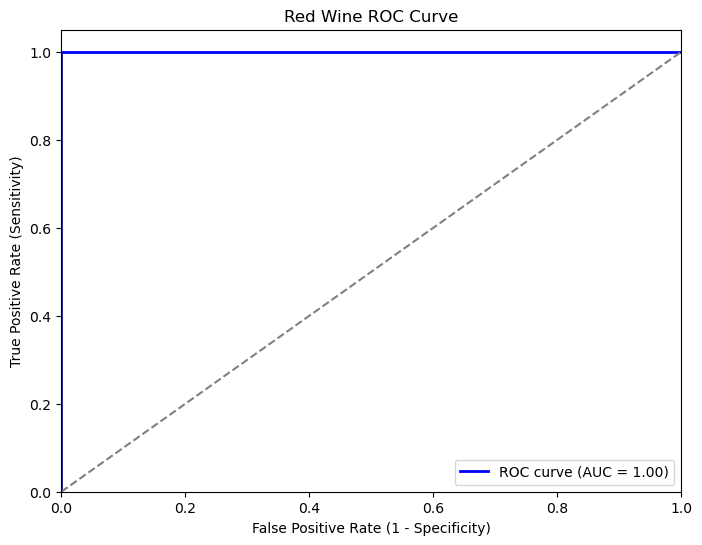

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Red Wine ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [40]:
y_pred= forestclassifier.predict(white_x)

In [41]:
auc = roc_auc_score(white_y, y_pred)

In [42]:
fpr, tpr, thresholds = roc_curve(white_y, y_pred)

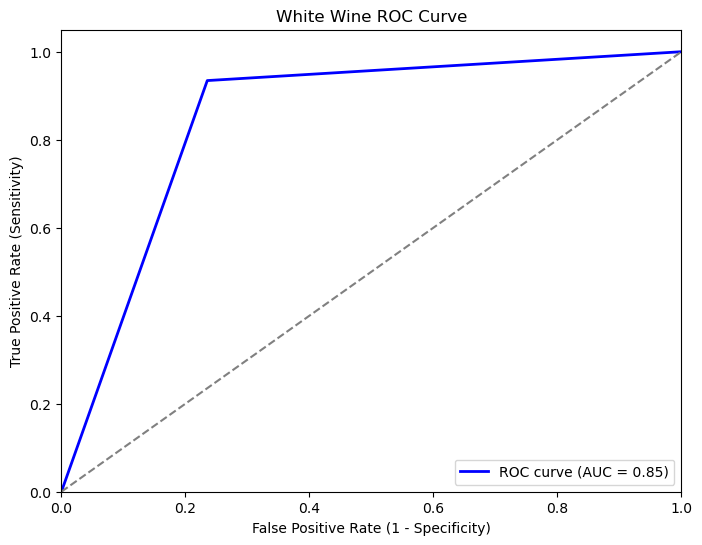

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('White Wine ROC Curve')
plt.legend(loc='lower right')
plt.show()